In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhiskp","key":"eed4e593d559cc8f4b1d011a8f33db10"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
    !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:10<00:00, 251MB/s]
100% 2.29G/2.29G [00:10<00:00, 228MB/s]


In [ ]:

!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
train_dir = './chest_xray/train'
test_dir = './chest_xray/test'

In [ ]:
train_data = keras.preprocessing.image_dataset_from_directory(
    './chest_xray/train',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=42
)

val_data = keras.preprocessing.image_dataset_from_directory(
    './chest_xray/train',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=42
)

test_data = keras.preprocessing.image_dataset_from_directory(
    './chest_xray/test',
    batch_size=32,
    image_size=(224, 224),
)


Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.


In [ ]:
#Data normalization and augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [ ]:

# Define the CNN model architecture
model = keras.Sequential([
  data_augmentation,
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.TruePositives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalseNegatives()])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=15)

# Test the model
y_pred = []
y_true = []
for x, y in test_data:
  y_pred.extend(model.predict(x).flatten().tolist())
  y_true.extend(y.numpy().tolist())

test_loss, test_accuracy, test_precision, test_recall, test_auc, tp, fp, tn, fn = model.evaluate(test_data)


Epoch 1/15
131/131 [==============================] - 192s 1s/step - loss: 0.6052 - accuracy: 0.7290 - precision: 0.7418 - recall: 0.9708 - auc: 0.5486 - true_positives: 2991.0000 - false_positives: 1041.0000 - true_negatives: 51.0000 - false_negatives: 90.0000 - val_loss: 0.4984 - val_accuracy: 0.8140 - val_precision: 0.8425 - val_recall: 0.9295 - val_auc: 0.8692 - val_true_positives: 738.0000 - val_false_positives: 138.0000 - val_true_negatives: 111.0000 - val_false_negatives: 56.0000
Epoch 2/15
131/131 [==============================] - 191s 1s/step - loss: 0.3730 - accuracy: 0.8301 - precision: 0.8559 - recall: 0.9257 - auc: 0.8808 - true_positives: 2852.0000 - false_positives: 480.0000 - true_negatives: 612.0000 - false_negatives: 229.0000 - val_loss: 0.2479 - val_accuracy: 0.8859 - val_precision: 0.8805 - val_recall: 0.9836 - val_auc: 0.9622 - val_true_positives: 781.0000 - val_false_positives: 106.0000 - val_true_negatives: 143.0000 - val_false_negatives: 13.0000
Epoch 3/15
131/

In [ ]:
model.save('path/to/model.h5')

In [ ]:
print(tp, fp, tn, fn)

388.0 112.0 122.0 2.0


In [ ]:
print("Precision :"+ str(tp/(tp+fp)))
print("Recall :"+ str(tp/(tp+fn)))
print('Accuracy:', test_accuracy)
print('AUC:', test_auc)
print("F1 score : "+str((tp)/(tp+(0.5*(fp+fn)))))


Precision :0.9394673123486683
Recall :0.9948717948717949
Accuracy: 0.9597563858032226
AUC: 0.949934184551239
F1 score : 0.9663760896637609


In [ ]:

fp = 25.0000
# print('Confusion Matrix:\n', confusion_matrix(y_true,0))
y_pred_bin = np.where(np.array(y_pred) > 0.7, 1, 0)

print(y_pred)
print(y_pred_bin)
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred_bin))
print('Classification Report:\n', classification_report(y_true, y_pred_bin))


[0.562920331954956, 0.9998043775558472, 0.5239595174789429, 0.9789307713508606, 0.998920738697052, 0.01080398727208376, 0.9999640583992004, 0.9999838471412659, 0.002951917937025428, 0.9912201166152954, 0.04347816854715347, 0.999984622001648, 0.9999760389328003, 0.14100955426692963, 0.9706065654754639, 0.9854464530944824, 0.9999876618385315, 0.9997762441635132, 0.9999954700469971, 0.2687515616416931, 0.9998692870140076, 0.4255244731903076, 0.9731349945068359, 0.01462553534656763, 0.10813743621110916, 0.9999527931213379, 0.03296646475791931, 0.999994695186615, 0.9999964237213135, 0.9906858801841736, 0.9999889731407166, 0.8118553161621094, 0.9998626112937927, 0.9853225946426392, 0.999745786190033, 0.9997590184211731, 0.4881007969379425, 0.9999632835388184, 0.9986382126808167, 0.11545685678720474, 0.657148540019989, 0.35456663370132446, 0.8003209233283997, 0.9995645880699158, 0.9998286962509155, 0.5696600675582886, 0.9975846409797668, 0.48224762082099915, 0.007511227857321501, 0.9888055920

In [ ]:
# Print the evaluation metrics

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', test_auc)

y_pred_bin = np.where(np.array(y_pred) > 0.7, 1, 0)
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred_bin))
print('Classification Report:\n', classification_report(y_true, y_pred_bin))
# print('F1 Score:', f1_score(y_true, y_pred_bin))
# print('ROC AUC Score:', roc_auc_score(y_true, y_pred))

Test Loss: 0.21748300194740294
Test Accuracy: 0.9597563858032226
Test Precision: 0.9144989609718323
Test Recall: 0.9948717951774597
Test AUC: 0.949934184551239
Confusion Matrix:
 [[127 107]
 [  2 388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.54      0.70       234
           1       0.78      0.99      0.88       390

    accuracy                           0.83       624
   macro avg       0.88      0.77      0.79       624
weighted avg       0.86      0.83      0.81       624



In [ ]:
# Print the evaluation metrics

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', test_auc)

y_pred_bin = np.where(np.array(y_pred) > 0.5, 1, 0)
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred_bin))
print('Classification Report:\n', classification_report(y_true, y_pred_bin))
# print('F1 Score:', f1_score(y_true, y_pred_bin))
# print('ROC AUC Score:', roc_auc_score(y_true, y_pred))


Test Loss: 0.21748300194740294
Test Accuracy: 0.9597563858032226
Test Precision: 0.9144989609718323
Test Recall: 0.9794871807098389
Test AUC: 0.9519175887107849
Confusion Matrix:
 [[147  87]
 [  8 382]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.63      0.76       234
           1       0.81      0.98      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.80      0.82       624
weighted avg       0.86      0.85      0.84       624



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

ValueError: ignored

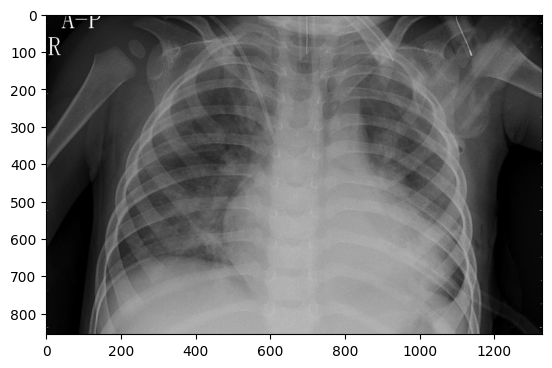

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model


model = load_model('path/to/model.h5')
 #Load the image
img = cv2.imread('./chest_xray/train/PNEUMONIA/person401_virus_798.jpeg')
plt.imshow(img)

img = cv2.resize(img, (300, 300))
img = img/255.0

img = img.reshape(1,300,300,3)


# Convert the image to a float32 tensor
# img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
# img_tensor = img_tensor / 255.0

# Add a batch dimension to the tensor
# img_tensor = tf.expand_dims(img_tensor, axis=0)

# Get the predicted class and the corresponding feature map

# preds = model.predict(img)
# plt.imshow(img)

class_idx = np.argmax(0.56)
last_conv_layer = model.get_layer('last_conv_layer').output
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer, model.output])
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_tensor)
    loss = predictions[:, class_idx]

# Get the gradients of the last convolutional layer with respect to the loss
grads = tape.gradient(loss, conv_outputs)[0]

# Compute the channel-wise mean of the gradients
weights = tf.reduce_mean(grads, axis=(0, 1))

# Compute the weighted sum of the feature maps
cam = np.dot(last_conv_layer[0], weights)

# Rescale the cam so that it has the same dimensions as the input image
cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
cam = cam / cam.max()

# Convert the cam to a heatmap
heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)

# Overlay the heatmap on the input image
overlay = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), 0.5, heatmap, 0.5, 0)

# Display the input image, the heatmap, and the overlay
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(heatmap)
ax[1].set_title('Heatmap')
ax[1].axis('off')
ax[2].imshow(overlay)
ax[2].set_title('Overlay')
ax[2].axis('off')
plt.show()
